In [1]:
from graph import Graph
import numpy as np
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from tqdm import tqdm
import pandas as pd

In [2]:
path = "./src/environment/mazes/mazes5/train/"
structures = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
train_graph = Graph(structures, params={"shape": (5, 5)})

In [3]:
path = "./src/environment/mazes/mazes5/eval/"
structures = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
eval_graph = Graph(structures, params={"shape": (5, 5)})

In [4]:
data = defaultdict(dict)

In [5]:
for key, graph in tqdm(eval_graph.graphs.items()):
    distances, distances_per_level = train_graph.graph_distance(graph)
    closest_graph = np.argmin(list(distances.values()))
    data[key]["graph_distance"] = list(distances.values())[closest_graph]
    data[key]["graph_distance_per_level"] = list(distances_per_level.values())[closest_graph]
    data[key]["graph_distance_structure"] = list(distances.keys())[closest_graph]
    data[key]["graph_distance_index"] = closest_graph

100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 334.85it/s]


In [6]:
for key, graph in tqdm(eval_graph.graphs.items()):
    similarities, _ = train_graph.path_similarity(key)
    closest_path = np.argmax(list(similarities.values()))
    data[key]["path_similarity"] = list(similarities.values())[closest_path]
    data[key]["path_similarity_structure"] = list(distances.keys())[closest_path]
    data[key]["path_similarity_index"] = closest_path

100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 121.82it/s]


In [9]:
eval = [
    './src/environment/mazes/mazes5/eval/-7476720968185065103.txt',
    './src/environment/mazes/mazes5/eval/-8211499597064120230.txt',
    './src/environment/mazes/mazes5/eval/-6631179603656073622.txt',
    './src/environment/mazes/mazes5/eval/7383378684313631944.txt',
    './src/environment/mazes/mazes5/eval/-9115002010401811178.txt',
    './src/environment/mazes/mazes5/eval/-494119388140148471.txt',
    './src/environment/mazes/mazes5/eval/-1700960892179521921.txt',
    './src/environment/mazes/mazes5/eval/176730241957249462.txt',
    './src/environment/mazes/mazes5/eval/-3898916166169490102.txt',
    './src/environment/mazes/mazes5/eval/5459351381145982173.txt',
    './src/environment/mazes/mazes5/eval/-1908309414215244843.txt',
    './src/environment/mazes/mazes5/eval/98184187347062480.txt',
    './src/environment/mazes/mazes5/eval/-3471732386427983732.txt',
    './src/environment/mazes/mazes5/eval/-3730386866486107415.txt',
    './src/environment/mazes/mazes5/eval/-8725014449107949284.txt',
    './src/environment/mazes/mazes5/eval/-5590948505292524320.txt',
    './src/environment/mazes/mazes5/eval/3557251499899203309.txt',
    './src/environment/mazes/mazes5/eval/-7546699870903099376.txt',
    './src/environment/mazes/mazes5/eval/4445186782854151370.txt',
    './src/environment/mazes/mazes5/eval/-3461127403629025478.txt',
    './src/environment/mazes/mazes5/eval/-3848981448323203534.txt',
    './src/environment/mazes/mazes5/eval/-8236828483844575246.txt',
    './src/environment/mazes/mazes5/eval/6650945726939359370.txt',
    './src/environment/mazes/mazes5/eval/5588338120162703524.txt',
    './src/environment/mazes/mazes5/eval/-496484261979328336.txt',
    './src/environment/mazes/mazes5/eval/6979190515652113813.txt',
    './src/environment/mazes/mazes5/eval/5415240723892962488.txt',
    './src/environment/mazes/mazes5/eval/-4998242278451476033.txt',
    './src/environment/mazes/mazes5/eval/3090624859511701377.txt',
    './src/environment/mazes/mazes5/eval/-813931956192332934.txt',
    './src/environment/mazes/mazes5/eval/-5103405496353236587.txt'
]
df = pd.DataFrame(data).T.reset_index()

In [18]:
df[df["index"].isin(eval)]\
[["graph_distance", "graph_distance_per_level", "path_similarity", "path_similarity_index"]]\
.sort_values(by="path_similarity", ascending=False)

,graph_distance,graph_distance_per_level,path_similarity,path_similarity_index
1,6,"{0: 0, 1: 1, 2: 0, 3: 2, 4: 2, 5: 1, 6: 0, 7: ...",1.0,42
95,7,"{0: 0, 1: 0, 2: 1, 3: 0, 4: 2, 5: 3, 6: 1, 7: ...",1.0,12
13,9,"{0: 0, 1: 0, 2: 1, 3: 2, 4: 2, 5: 2, 6: 1, 7: ...",1.0,62
18,8,"{0: 0, 1: 0, 2: 4, 3: 1, 4: 2, 5: 0, 6: 0, 7: ...",1.0,30
81,10,"{0: 0, 1: 2, 2: 2, 3: 2, 4: 1, 5: 2, 6: 1, 7: ...",1.0,30
43,9,"{0: 0, 1: 0, 2: 2, 3: 3, 4: 3, 5: 0, 6: 0, 7: ...",1.0,30
9,4,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 4, 6: 0, 7: ...",0.923077,22
93,11,"{0: 2, 1: 1, 2: 4, 3: 3, 4: 0, 5: 0, 6: 0, 7: ...",0.909091,39
89,6,"{0: 0, 1: 2, 2: 1, 3: 0, 4: 0, 5: 0, 6: 2, 7: ...",0.909091,41
86,8,"{0: 0, 1: 3, 2: 0, 3: 2, 4: 3, 5: 0, 6: 0, 7: ...",0.909091,18


In [13]:
df[~df["index"].isin(eval)]\
[["graph_distance", "graph_distance_per_level", "path_similarity", "path_similarity_index"]]\
.sort_values(by="path_similarity", ascending=False)

,graph_distance,graph_distance_per_level,path_similarity,path_similarity_index
45,9,"{0: 2, 1: 0, 2: 2, 3: 3, 4: 1, 5: 0, 6: 0, 7: ...",1.0,5
82,10,"{0: 2, 1: 0, 2: 5, 3: 1, 4: 2, 5: 0, 6: 0, 7: ...",1.0,25
99,4,"{0: 0, 1: 0, 2: 0, 3: 1, 4: 2, 5: 1, 6: 0, 7: ...",0.933333,95
22,9,"{0: 0, 1: 1, 2: 2, 3: 4, 4: 1, 5: 1, 6: 0, 7: ...",0.909091,65
75,8,"{0: 1, 1: 1, 2: 3, 3: 0, 4: 1, 5: 2, 6: 0, 7: ...",0.909091,65
...,...,...,...,...
52,8,"{0: 0, 1: 1, 2: 4, 3: 1, 4: 1, 5: 0, 6: 0, 7: ...",0.555556,92
67,6,"{0: 0, 1: 0, 2: 0, 3: 2, 4: 1, 5: 1, 6: 2, 7: ...",0.545455,48
15,10,"{0: 0, 1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 1, 7: ...",0.545455,65
57,8,"{0: 0, 1: 0, 2: 2, 3: 3, 4: 1, 5: 0, 6: 0, 7: ...",0.466667,27


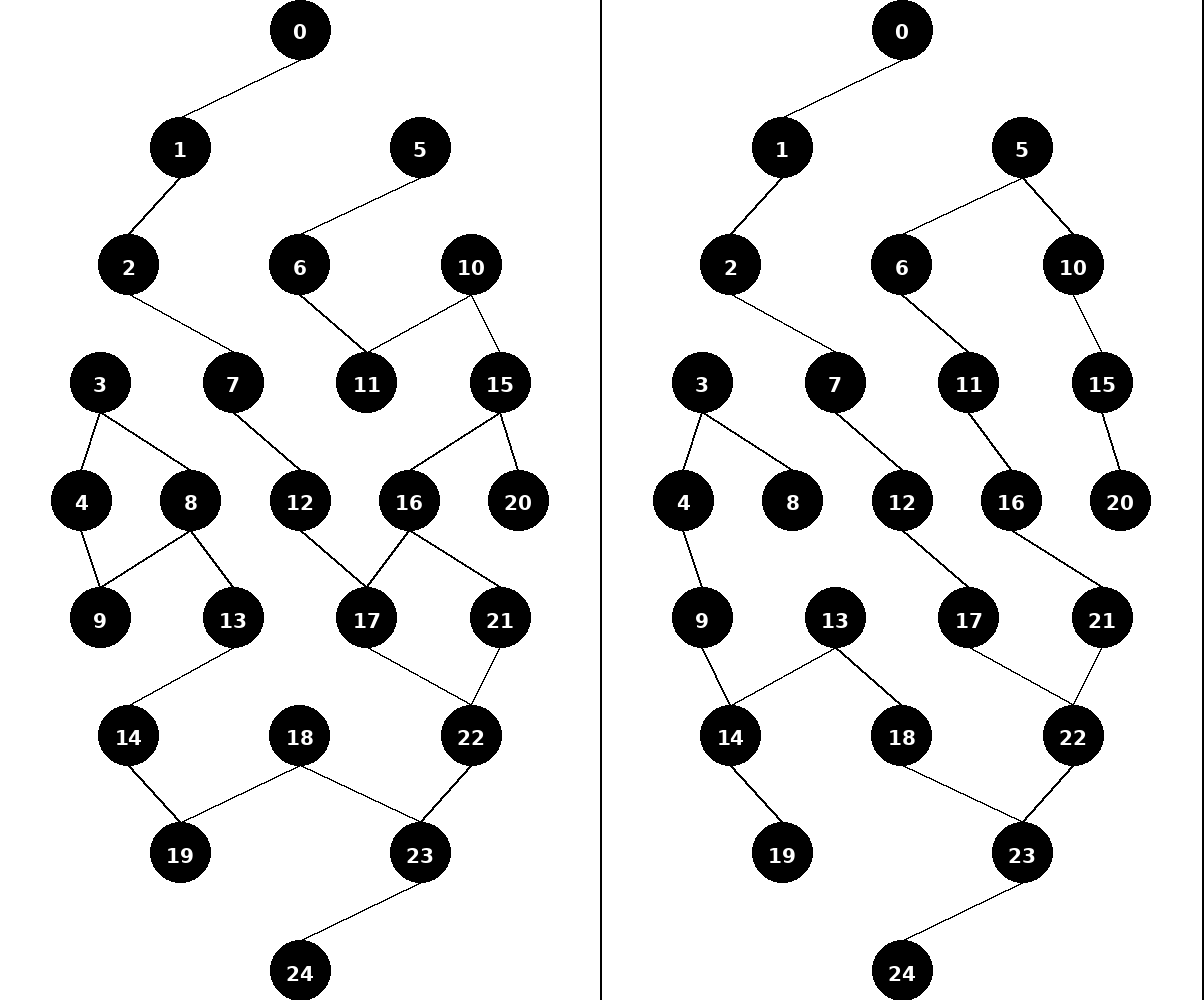

In [15]:
graphs = [
    train_graph.draw_graph(list(eval_graph.graphs.values())[45]),
    train_graph.draw_graph(list(train_graph.graphs.values())[5]),                   
]
train_graph.collate_graphs(graphs)